In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier


In [2]:
def plt_corner(data,Tclass,feature_names):
    #This function make a corner plot of all the features of the dataset, and have as color code the quality of the wine, which is what we want to predict.
    pts=1
    nb_row=data.shape[1]
    fig, Tax = plt.subplots(nb_row,nb_row)
    fig.suptitle('dataset')
    fig.set_size_inches(10,10)

    for k in range(nb_row):
        for l in range(nb_row):
            if l<k:
               im1=Tax[k,l].scatter(data[:,l],data[:,k],c=Tclass,s=pts,cmap='jet')
            else:
                Tax[k,l].set_axis_off()
            if k==nb_row-1:
                Tax[k,l].set_xlabel(feature_names[l],rotation=45)
            if l==0:
                Tax[k,l].set_ylabel(feature_names[k],rotation=75)
    for ax in fig.get_axes():
        ax.label_outer()


We now load the dataset, and have a look at the data using the plt_corner function defined above

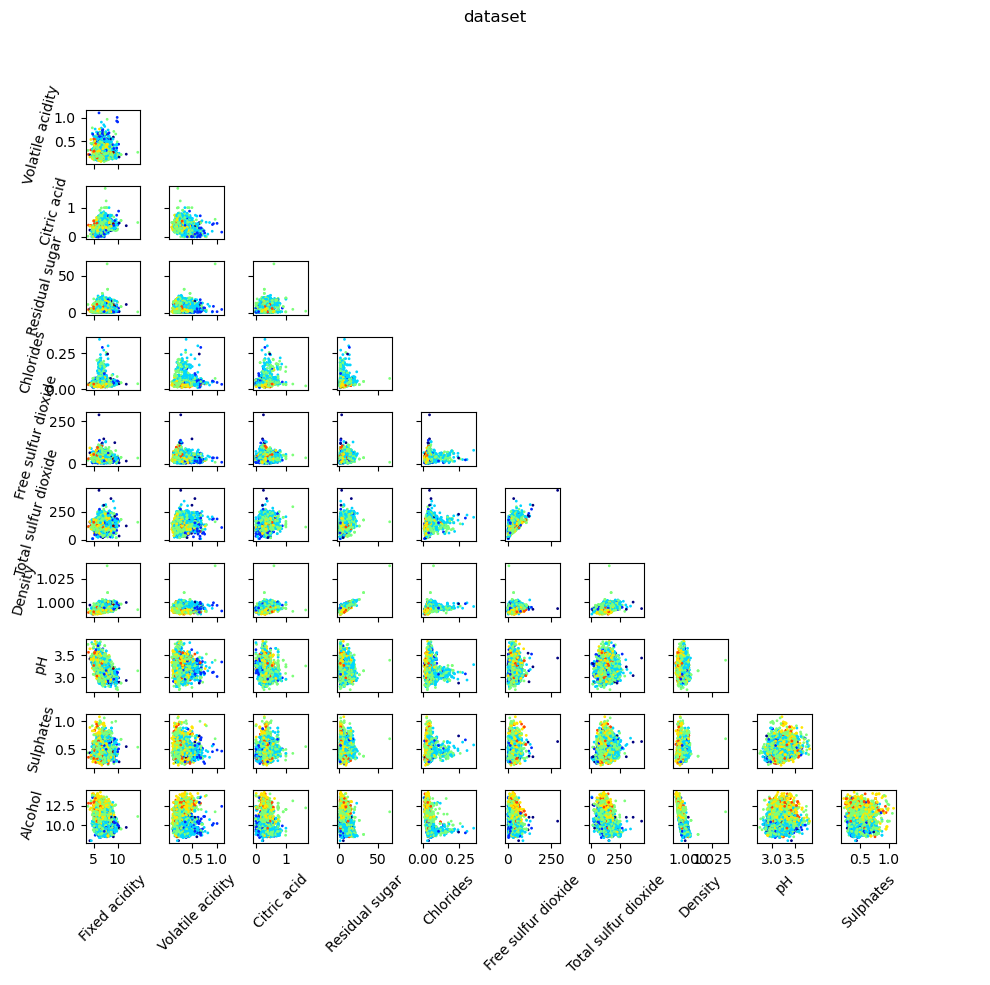

In [3]:
Tdata=np.genfromtxt("C:\\Users\\casey\\UnigeMasters\\Astrophysics_and_Data_Analysis\\Databases\\winequality-white.csv",delimiter=';')

random.seed(2)
np.random.shuffle(Tdata)
X=Tdata[:,:-1]
Tclass=Tdata[:,-1]

feature_names=['Fixed acidity',
'Volatile acidity',
'Citric acid',
'Residual sugar',
'Chlorides',
'Free sulfur dioxide',
'Total sulfur dioxide',
'Density',
'pH',
'Sulphates',
'Alcohol']



plt_corner(X,Tclass,feature_names)
plt.tight_layout()
plt.savefig('wine.png')

We also have a look at the distibution of wine quality in the sample

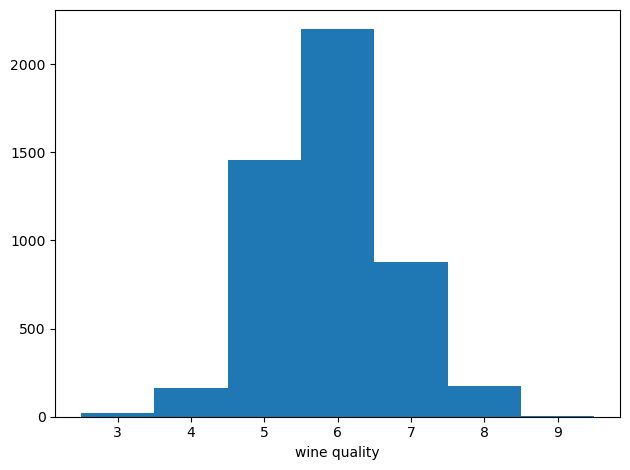

In [4]:


plt.figure()
bins=np.arange(2.5,9.8,1)
plt.hist(Tclass,bins=bins)
plt.xlabel('wine quality')
plt.tight_layout()
plt.savefig('wine_quality.png')

We now define the labels y, whild is either 1, or True for a wine whose qality if above 5, or 0, or False, for a whine whose quality is of 5 or less

In [5]:
output_names=['wine quality']

y=Tclass>5.5




We then cut our dataset in a 'training set' and a 'validation set'

In [6]:

X_train,y_train=X[:4000,:], y[:4000]
X_validation,y_validation=X[4000:,:],y[4000:]
quality_validation=Tclass[4000:]

We create the random forest, with n_estimators trees, and the maximum depth, or layers of nodes, for each tree

In [88]:
n_estimators=1# number of trees
max_depth=3 # number of nodes
forest = RandomForestClassifier(n_estimators,verbose=0,max_depth=max_depth)

We can the train the forest on the training set

In [89]:
# Xtain are features, ytrain are labels
forest.fit(X_train,y_train)




,n_estimators,1
,criterion,'gini'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


We can the compute the score of the trained random forest on the validation data set

In [ ]:
score_training=forest.score(X_train,y_train)
score_validation=forest.score(X_validation,y_validation)

print('score_training',score_training)

print('score_validation',score_validation)

score_training 0.68375
score_validation 0.6937639198218263


Let us use our trainined forest to predict the label of the validation dataset

In [107]:
y_pred=forest.predict(X_validation)
y_pred_train=forest.predict(X_train)




In [93]:
tree_n = [1,2,5,10,30,50,100]
training = [0.69375,0.741,
0.743,
0.75325,
0.7595,
0.762,
0.76225,]
validation = [0.70601,
0.72494,
0.73608,
0.74164,
0.74944,
0.75278,
0.75612]

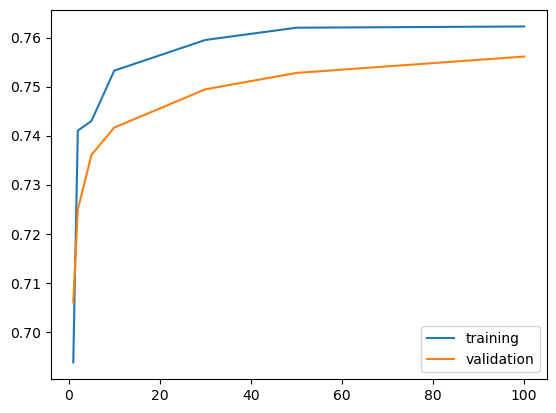

In [94]:
plt.plot(tree_n, training, label='training')
plt.plot(tree_n, validation, label='validation')
plt.legend()

In [ ]:
def IM_CONFUSED(y_label, y_pred):
    TP=np.sum(np.logical_and(y_label==True, y_pred==True))
    FP=np.sum(np.logical_and(y_label==False, y_pred==True))
    TN=np.sum(np.logical_and(y_label==False, y_pred==False))
    FN=np.sum(np.logical_and(y_label==True, y_pred==False))
    
    
    print('confusion matrix:')
    print('Confusion matrix? I hardly know her!')
    print('\n')
    print('prediction: bad good')
    print('label bad:', TN, FP)
    print('label good:', FN, TP)

    print('\n')
    print('metrics')
    print('\n')
    print('accuracy', (TP+TN)/y_pred.size)
    print('False Positive', (FP/(FP+TP)))
    print('Recall rate good', (TP/(TP+FN)))
    print('Recall rate bad', (TN/(FP+TN)))
    
    
    return (TP+TN)/(TP+TN+FP+FN)

In [120]:
valid = IM_CONFUSED(y_validation, y_pred)
score = IM_CONFUSED(y_train, y_pred_train)

print(valid)
print('\n')
print(score)

confusion matrix:
Confusion matrix? I hardly know her!


prediction: bad good
label bad: 231 87
label good: 188 392


metrics


accuracy 0.6937639198218263
False Positive 0.18162839248434237
Recall rate good 0.6758620689655173
Recall rate bad 0.7264150943396226
confusion matrix:
Confusion matrix? I hardly know her!


prediction: bad good
label bad: 987 335
label good: 930 1748


metrics


accuracy 0.68375
False Positive 0.16082573211713874
Recall rate good 0.6527259148618372
Recall rate bad 0.7465960665658093
0.6937639198218263


0.68375
